# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import seaborn as sns
from matplotlib import rcParams

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
#to look the weather api format
url = "http://api.openweathermap.org/data/2.5/weather?"
response=requests.get(url, params={'appid':weather_api_key,'q':'kathmandu','units':'imperial' })
weather=response.json()
weather

In [ ]:
weather['sys']['sunrise']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
for i, city in enumerate(cities):
    weather=requests.get(url, params={'appid':weather_api_key,
                                      'q':city,
                                     'units':'imperial'}).json()
    try:
        City.append(weather['name'])
        Lat.append(weather['coord']['lat'])   
        Lng.append(weather['coord']['lon'])
        Max_Temp.append(weather['main']['temp_max'])
        Humidity.append(weather['main']['humidity'])
        Cloudiness.append(weather['clouds']['all'])
        Wind_Speed.append(weather['wind']['speed'])
        Country.append(weather['sys']['country'])
        Date.append(weather['sys']['sunrise'])
        
        print(f'Processing Record of city number {i+1} of {city.title()}')
    except:
        print(f'City {i+1} not found. Skipping...')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_data=pd.DataFrame({'City':City,
                'Lat':Lat,
                "Lng":Lng,
                'Max Temp': Max_Temp,
                'Humidity':Humidity,
                'Cloudiness': Cloudiness,
                'Wind Speed': Wind_Speed,
                "Country": Country,
                'Date':Date})


In [ ]:
city_data.to_csv('output_data/city_data.csv', index=False)

In [2]:
city_data=pd.read_csv('output_data/city_data.csv')

In [20]:
city_data.to_html('output_data/city_data.html')

In [3]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.2667,141.8833,54.55,50,69,11.32,JP,1634935798
1,Mar del Plata,-38.0023,-57.5575,55.99,91,90,1.01,AR,1634979200
2,Mardin,37.3131,40.7436,55.51,38,0,2.30,TR,1634959942
3,Puerto Ayora,-0.7393,-90.3518,69.96,86,37,7.00,EC,1634902902
4,Cabo San Lucas,22.8909,-109.9124,78.62,81,1,5.99,MX,1634908767


In [4]:
city_data.shape

(842, 9)

In [5]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        842 non-null    object 
 1   Lat         842 non-null    float64
 2   Lng         842 non-null    float64
 3   Max Temp    842 non-null    float64
 4   Humidity    842 non-null    int64  
 5   Cloudiness  842 non-null    int64  
 6   Wind Speed  842 non-null    float64
 7   Country     836 non-null    object 
 8   Date        842 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 59.3+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data[city_data['Humidity']>=100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
21,Tuktoyaktuk,69.4541,-133.0374,33.80,100,90,11.50,CA,1634920404
184,Brazzaville,-4.2658,15.2832,75.51,100,20,3.44,CG,1634963770
201,Saskylakh,71.9167,114.0833,-11.07,100,94,2.66,RU,1634948773
204,Cherskiy,68.7500,161.3000,-3.62,100,99,3.36,RU,1634935927
409,Inuvik,68.3499,-133.7218,33.01,100,90,3.44,CA,1634920138
425,Vestmanna,62.1564,-7.1664,45.52,100,90,19.57,FO,1634974527
514,Paso de Carrasco,-34.8603,-56.0522,59.14,100,90,11.50,UY,1634979091
625,Saint-François,46.4154,3.9054,36.68,100,90,2.30,FR,1634969565
675,Lewistown,40.5992,-77.5714,55.90,100,75,0.00,US,1634902146
739,Carquefou,47.2982,-1.4902,39.27,100,2,2.30,FR,1634970950


In [7]:
city_data=(city_data[city_data['Humidity']<=100])
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.2667,141.8833,54.55,50,69,11.32,JP,1634935798
1,Mar del Plata,-38.0023,-57.5575,55.99,91,90,1.01,AR,1634979200
2,Mardin,37.3131,40.7436,55.51,38,0,2.30,TR,1634959942
3,Puerto Ayora,-0.7393,-90.3518,69.96,86,37,7.00,EC,1634902902
4,Cabo San Lucas,22.8909,-109.9124,78.62,81,1,5.99,MX,1634908767
...,...,...,...,...,...,...,...,...,...
837,Flin Flon,54.7682,-101.8650,33.96,79,100,7.09,CA,1634909452
838,Okha,53.5739,142.9478,41.40,79,97,13.78,RU,1634936973
839,Sāyla,22.5500,71.4667,79.02,54,19,11.36,IN,1634951631
840,Kaduy,59.2000,37.1500,41.04,92,100,11.10,RU,1634963275


In [8]:
city_data.shape

(842, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
plt.style.use('ggplot')

In [11]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [10.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

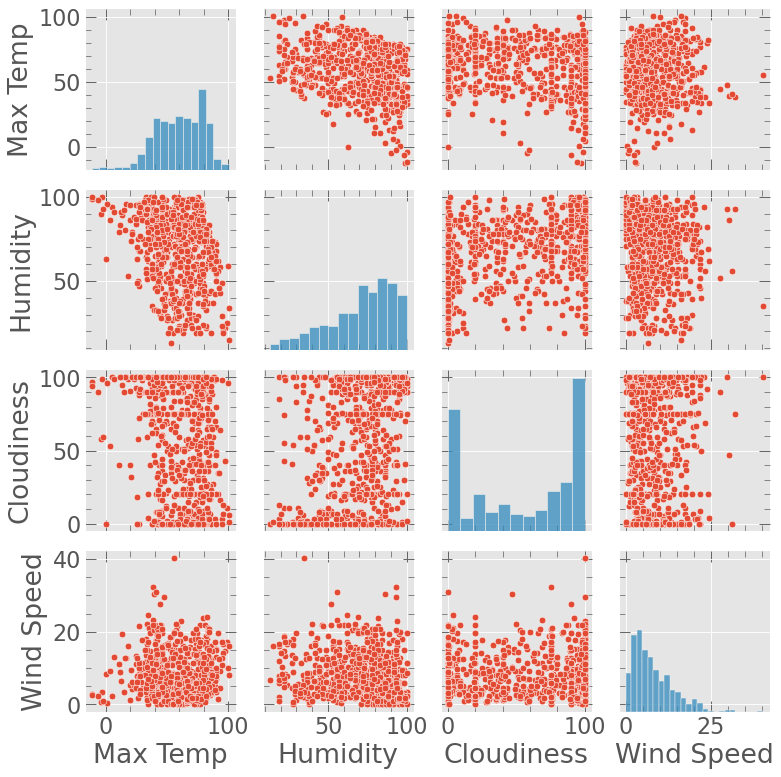

In [18]:
sns.pairplot(city_data[['Max Temp','Humidity','Cloudiness','Wind Speed']], diag_kind="hist")
plt.savefig("figures/pairplot.png", bbox_inches="tight")
plt.show()

## Latitude vs. Temperature, Latitude vs. Cloudness,  Latitude vs. Humidity, Latitude vs. Wind Speed Plot

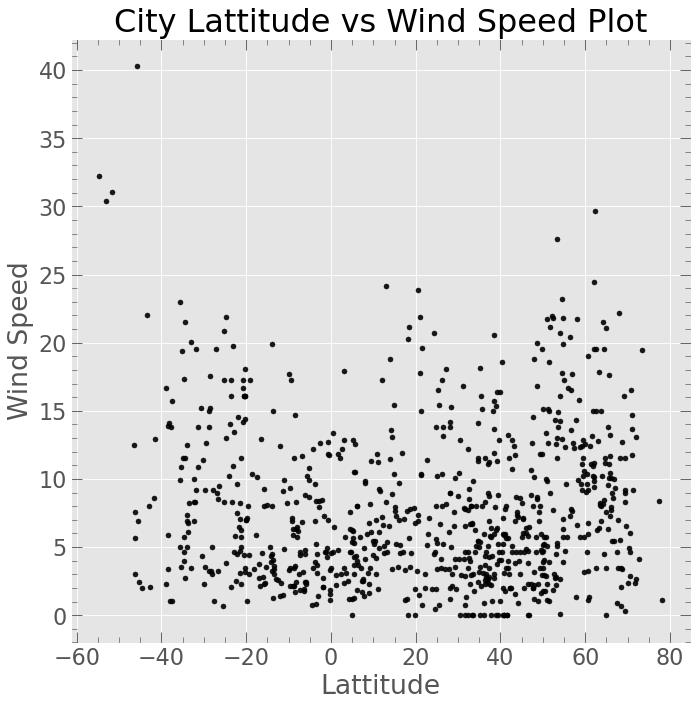

In [ ]:
cols=['Max Temp','Humidity','Cloudiness','Wind Speed']
color=["red", "blue", "green", "black"]
fig = plt.figure(figsize=(20,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    city_data.plot(kind='scatter', x='Lat',y=cols[i-1],color=color[i-1], alpha=0.9, ax=ax)
    ax.set(title=f'Lattitude vs {cols[i-1]} Plot', xlabel='Lattitude')
    fig.savefig(f'figures/city_{cols[i-1]}.png', bbox_inches="tight")
plt.show()

- For lattitude and maximum temperature, it is posivitely related to lattitude 0 and negatively related after that.
- Where as lattitude and cloudiness, lattitude and wind speed, and lattitude and Humidity there is no definitive pattern. 

In [ ]:
#using seaborn scatter plot with differnt columns for  male and female
cols=['Max Temp','Humidity','Cloudiness','Wind Speed']
fig = plt.figure(figsize=(20,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    sns.scatterplot(x='Lat',y=cols[i-1],hue='Cloudiness', 
                size='Max Temp',sizes=(20, 150),
                data=city_data,alpha=0.9,ax=ax)
    ax.set(title=f'Lattitude vs {cols[i-1]} Plot', xlabel='Lattitude')

plt.show()


## Linear Regression

In [ ]:
corr=city_data.corr()

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True, ax=ax, cmap='BrBG')
plt.show()

##  Northern Hemisphere 
### 'Max Temp','Humidity','Cloudiness','Wind Speed' vs. 'Latitude'- Linear Regression

The r-squared of Northen Hemisphere- Max Temp Vs. Lattitude is: 0.8011524049678668
The r-squared of Northen Hemisphere- Humidity Vs. Lattitude is: 0.015588332724954301
The r-squared of Northen Hemisphere- Cloudiness Vs. Lattitude is: 0.03368553878734986
The r-squared of Northen Hemisphere- Wind Speed Vs. Lattitude is: 0.036884733597433654


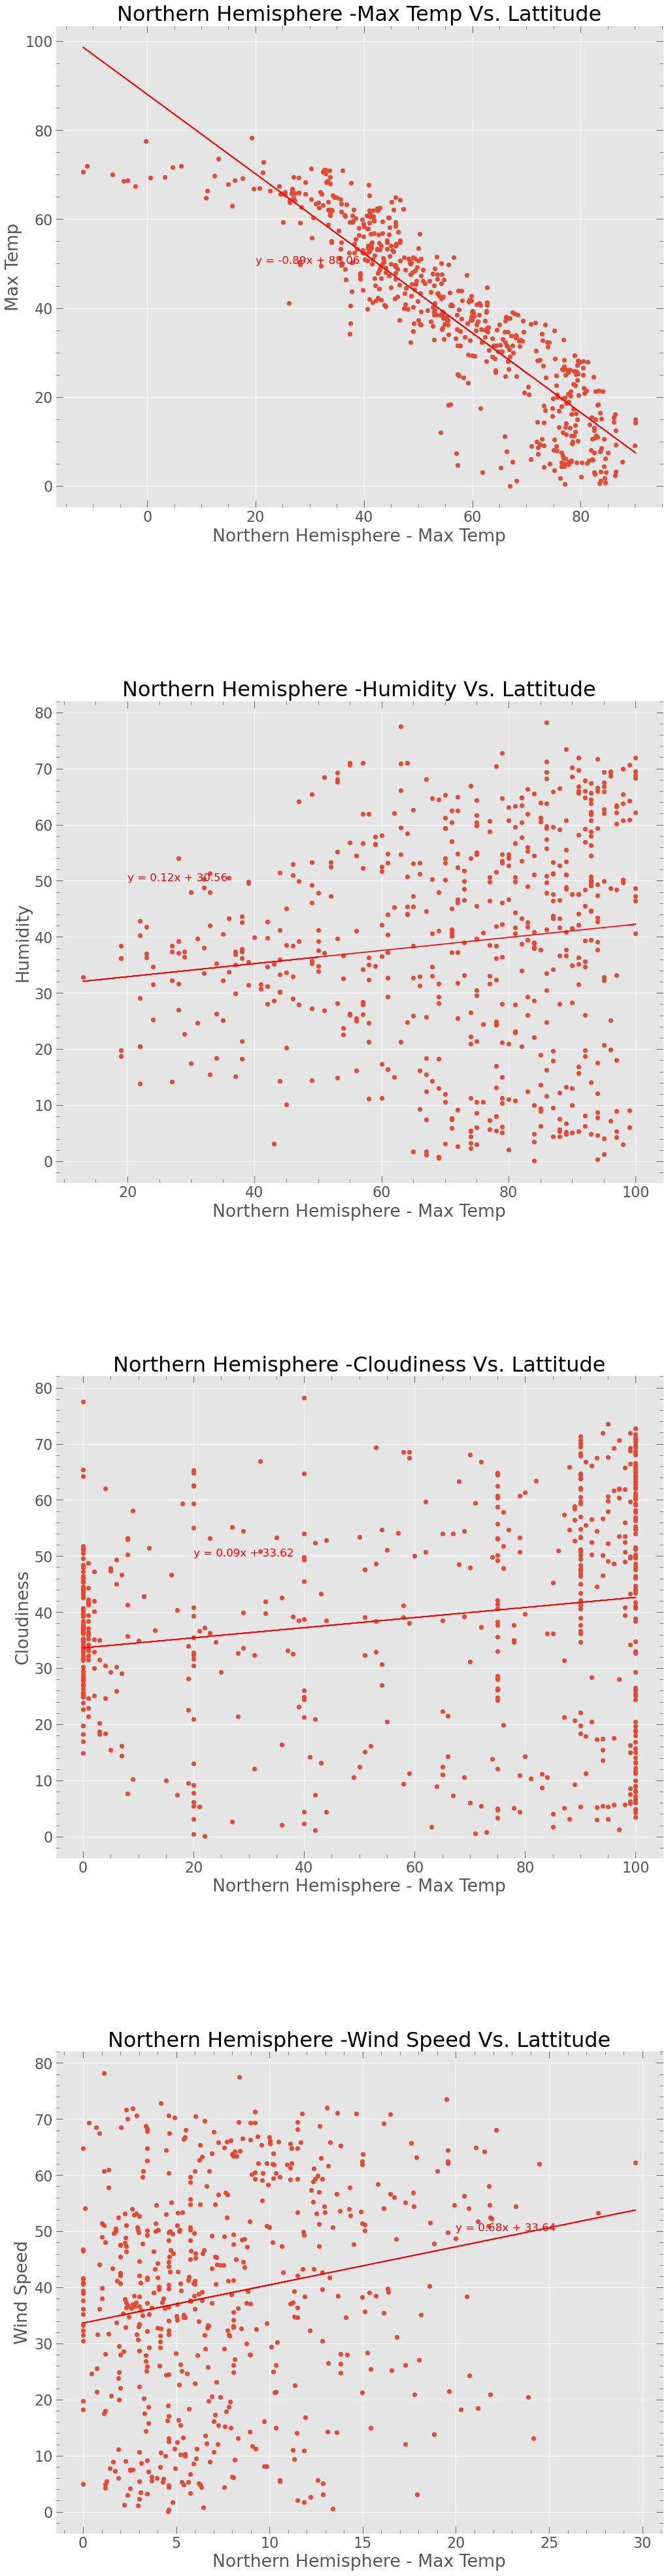

In [19]:
nort_data=city_data[city_data['Lat']>0]
y=nort_data['Lat']
c=['Max Temp','Humidity','Cloudiness','Wind Speed']
cols=[nort_data['Max Temp'],nort_data['Humidity'],nort_data['Cloudiness'],nort_data['Wind Speed']]
fig = plt.figure(figsize=(15,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(cols[i-1], y)
    regress_values = cols[i-1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.scatter(cols[i-1],y)
    ax.plot(cols[i-1],regress_values,"r-")
    ax.annotate(line_eq,(20,50),fontsize=15,color="red")
    ax.set_ylabel(f'{c[i-1]}')
    ax.set_xlabel('Northern Hemisphere - Max Temp')
    ax.set_title(f'Northern Hemisphere -{c[i-1]} Vs. Lattitude')
    print(f"The r-squared of Northen Hemisphere- {c[i-1]} Vs. Lattitude is: {rvalue**2}")


fig.subplots_adjust(
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)
plt.show()

- For lattitude and Northern hemisphere maximum temperature it is negatively related with slope -1.05
- Northern hemisphere Max temperature vs cloudiness and Humidity  there is no definitive pattern with a slope around 0
- Where as northern hemisphere max temperature vs  wind speed,  there is no slightly positive slope with a value around 0.29.

##  Southern Hemisphere 
### 'Max Temp','Humidity','Cloudiness','Wind Speed' vs. 'Latitude'- Linear Regression

In [ ]:
south_data=city_data[city_data['Lat']<0]
y=south_data['Lat']
c=['Max Temp','Humidity','Cloudiness','Wind Speed']
cols=[south_data['Max Temp'],south_data['Humidity'],south_data['Cloudiness'],south_data['Wind Speed']]
fig = plt.figure(figsize=(15,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(cols[i-1], y)
    regress_values = cols[i-1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.scatter(cols[i-1],y)
    ax.plot(cols[i-1],regress_values,"r-")
    ax.annotate(line_eq,(20,-40),fontsize=15,color="red")
    ax.set_ylabel(f'{c[i-1]}')
    ax.set_xlabel('Southern Hemisphere - Max Temp')
    ax.set_title(f'Southern Hemisphere -{c[i-1]} Vs. Lattitude Linear Regression')
    print(f"The r-squared of Southern Hemisphere- {c[i-1]} Vs. Lattitude is: {rvalue**2}")

fig.subplots_adjust(
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)
plt.show()


- For lattitude and Southern hemisphere maximum temperature, there is positivelyrelated with slope 1.05
- Southern hemisphere max temperature vs cloudiness and Humidity,  there is no definitive pattern with a slope around 0
- Northern hemisphere max temperature vs  wind speed there is no slightly negative slope with a value around -0.34.